# Prueba para vacante de Analista de Datos
Eduardo Contreras Bohórquez  
31 de enero de 2023  
Bogotá


In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def preprocesar_X(X):
    # Reemplazar valores no numéricos (ej. D4N3) por nulos.
    X = X.apply(pd.to_numeric, errors='coerce')
    # Imputar nulos con el promedio de cada columna.
    X = X.fillna(X.mean())
    # Remover columnas correlacionadas
    cols_a_remover = ['X_8','X_9','X_10','X_11','X_16','X_17','X_23','X_24','X_27','X_30']
    X = X.drop(cols_a_remover, axis=1)
    return(X)

# Lectura de datos
train_A = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Muestra/train_A.csv", sep='|')
train_B = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Muestra/train_B.csv", sep='|')
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Muestra/test_send.csv", sep='|')

# Left join
train = train_A.merge(train_B, on='ID', how='left')

# Separar X y Y
y = train.y_y.to_numpy()
X = train.filter(regex='^X',axis=1)
Xtest = test.drop(['ID'], axis=1)

# Análisis Exploratorio


In [2]:
XEDA = X

#Reemplazar valores no numéricos (ej. D4N3) por nulos.
XEDA = XEDA.apply(pd.to_numeric, errors='coerce')

# Verificación de valores nulos por columna
print(XEDA.isna().sum())

#Imputar nulos con el promedio de cada columna.
XEDA = XEDA.fillna(XEDA.mean())

X_1      5
X_2      5
X_3     23
X_4      3
X_5      2
X_6      2
X_7      5
X_8      1
X_9      1
X_10     2
X_11     0
X_12     3
X_13     0
X_14     2
X_15    11
X_16     0
X_17    29
X_18     3
X_19     4
X_20     1
X_21    78
X_22    73
X_23    71
X_24    71
X_25    77
X_26     1
X_27     1
X_28     2
X_29     2
X_30    24
dtype: int64


In [18]:
# Verificación de correlación entre columnas
corr = XEDA.corr(method='kendall')
pd.set_option('precision', 1)
corr.style.background_gradient(cmap='coolwarm')

# Entrenamiento Modelo 1: Gradient-boosted decision trees

In [3]:
pd.set_option('precision', 4)
X = preprocesar_X(X)

train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0              0.0575            0.0021            0.1171           0.0218
1              0.0467            0.0013            0.1039           0.0201
2              0.0397            0.0013            0.0944           0.0191
3              0.0338            0.0009            0.0853           0.0181
4              0.0298            0.0009            0.0833           0.0163
..                ...               ...               ...              ...
75             0.0000            0.0000            0.0517           0.0100
76             0.0000            0.0000            0.0520           0.0103
77             0.0000            0.0000            0.0519           0.0108
78             0.0000            0.0000            0.0519           0.0102
79             0.0000            0.0000            0.0520           0.0102

[80 rows x 4 columns]

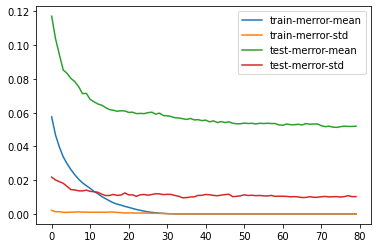

In [4]:
import xgboost as xgb

#***** Parametros de los árboles *****
num_arboles = 80
profundidad_arbol = 8
#*************************************

dtrain = xgb.DMatrix(X, label=y)
param = {'objective':'multi:softprob', 'num_class':3, 'eta':0.3, 'max_depth':profundidad_arbol}
history = xgb.cv(params=param, dtrain=dtrain, num_boost_round=num_arboles, nfold=20, verbose_eval=False)
history.plot()
history

# Entrenamiento modelo 2: Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate 

#***** Parametros de la red neuronal *****
epocas = 500
capas_ocultas = (100) # num neuronas por cada capa oculta
#*************************************

nn = MLPClassifier(solver='adam', activation='logistic', max_iter=epocas, tol=0.001, n_iter_no_change=20,
                   hidden_layer_sizes=capas_ocultas, learning_rate='adaptive', verbose=True)
cv_results = cross_validate(nn, X, y, cv=20, return_train_score=False) 

In [6]:
score = cv_results['test_score'].mean()
print(score, 1-score)

0.9598571428571429 0.04014285714285715


fit_time  score_time  test_score
0    10.3830      0.0053      0.9571
1    11.6205      0.0042      0.9543
2     9.5714      0.0041      0.9714
3    11.6779      0.0050      0.9743
4    11.2013      0.0042      0.9686
5    12.5449      0.0043      0.9686
6     9.7239      0.0040      0.9543
7    16.2449      0.0042      0.9543
8    11.1564      0.0055      0.9657
9     9.5137      0.0046      0.9571
10   20.4748      0.0052      0.9571
11   12.0832      0.0067      0.9571
12   11.3934      0.0042      0.9600
13   11.2244      0.0042      0.9571
14   13.0421      0.0054      0.9714
15   10.9468      0.0041      0.9514
16   12.0459      0.0042      0.9800
17   11.8954      0.0041      0.9600
18   11.2086      0.0044      0.9343
19   11.4133      0.0041      0.9429

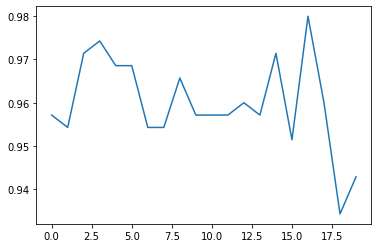

In [13]:
import matplotlib.pyplot as plt
plt.plot(cv_results['test_score'])
pd.DataFrame(cv_results)

# Predicción en Test

In [ ]:
Xtest = preprocesar_X(Xtest)

In [22]:
bst = xgb.train(params=param, dtrain=dtrain, num_boost_round=num_arboles)
dtest = xgb.DMatrix(Xtest)
y_pred1 = bst.predict(dtest)
y_pred1 = pd.DataFrame(y_pred1).idxmax(axis=1).to_numpy()
y_pred1

array([1, 1, 1, ..., 1, 1, 2])

In [24]:
nn = MLPClassifier(solver='adam', activation='logistic', max_iter=epocas, tol=0.001, n_iter_no_change=20,
                   hidden_layer_sizes=capas_ocultas, learning_rate='adaptive', verbose=True)
nn = nn.fit(X, y)
y_pred2 = nn.predict(Xtest)
y_pred2

Iteration 1, loss = 0.87709288
Iteration 2, loss = 0.65643520
Iteration 3, loss = 0.56937505
Iteration 4, loss = 0.52679665
Iteration 5, loss = 0.50502525
Iteration 6, loss = 0.49159122
Iteration 7, loss = 0.48181268
Iteration 8, loss = 0.47282152
Iteration 9, loss = 0.46496080
Iteration 10, loss = 0.45529477
Iteration 11, loss = 0.44607373
Iteration 12, loss = 0.43629650
Iteration 13, loss = 0.42695644
Iteration 14, loss = 0.41679743
Iteration 15, loss = 0.40699040
Iteration 16, loss = 0.39769739
Iteration 17, loss = 0.38990379
Iteration 18, loss = 0.37971507
Iteration 19, loss = 0.37130766
Iteration 20, loss = 0.36185512
Iteration 21, loss = 0.35410035
Iteration 22, loss = 0.34576623
Iteration 23, loss = 0.33793255
Iteration 24, loss = 0.33054082
Iteration 25, loss = 0.32374091
Iteration 26, loss = 0.31600182
Iteration 27, loss = 0.30931475
Iteration 28, loss = 0.30241252
Iteration 29, loss = 0.29615011
Iteration 30, loss = 0.29061879
Iteration 31, loss = 0.28370513
Iteration 32, los

array([1, 1, 1, ..., 1, 1, 2])

In [32]:
resultado_final = pd.DataFrame({'ID':test['ID'], 'y_pred1':y_pred1, 'y_pred2':y_pred2})
resultado_final.to_csv("/content/drive/MyDrive/Colab Notebooks/Muestra/resultado_final.csv", index=False)